# Supervised Machine Learning: Regression

## Contents

### 01 Importing libraries and data set
### 02 Data cleaning
### 03 Data prep for regression analysis
### 04 Regression analysis

## 01 Importing libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating path
path = r'C:\Users\zunai\OneDrive\Documents\Data Analytics\Achievement 6\Boat listings analysis'

In [4]:
# Import data set
df = pd.read_csv(os.path.join(path, '02 Data', 'boat_data_cleaned.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3535.0,Switzerland,Seengen
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4646.0,Switzerland,Zugersee


In [6]:
df.shape

(6001, 12)

In [7]:
# Drop columns not needed
df = df.drop(['Unnamed: 0'], axis = 1)

## 02 Data cleaning

In [8]:
# Rename column 
df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [9]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', '7days_views', 'EUR_price', 'Country', 'City'],
      dtype='object')

In [10]:
# Check for missing values
df.isnull().sum()

Boat Type       0
Manufacturer    0
Type            0
Year Built      0
Length          0
Width           0
Material        0
7days_views     0
EUR_price       0
Country         0
City            0
dtype: int64

In [11]:
# Check for duplicates
dups = df.duplicated()

In [12]:
dups.shape
# No duplicates found

(6001,)

C:\Users\zunai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

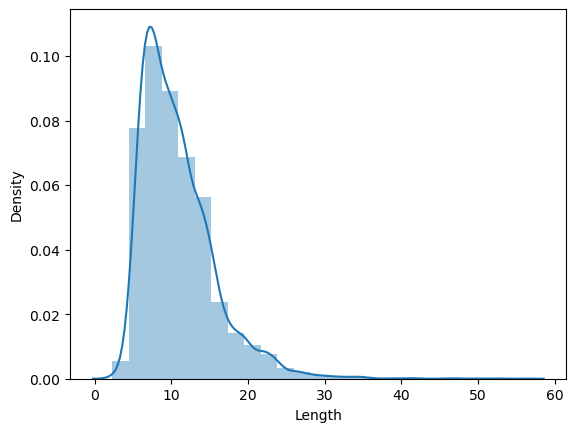

In [13]:
# Check for extreme values
sns.distplot(df['Length'], bins = 25)

In [14]:
df['Length'].mean()

10.834530911514786

In [15]:
df['Length'].median()

9.88

In [16]:
df['Length'].max()

56.0

In [17]:
df['Length'].min()

2.32

## 03 Data prep for regression analysis

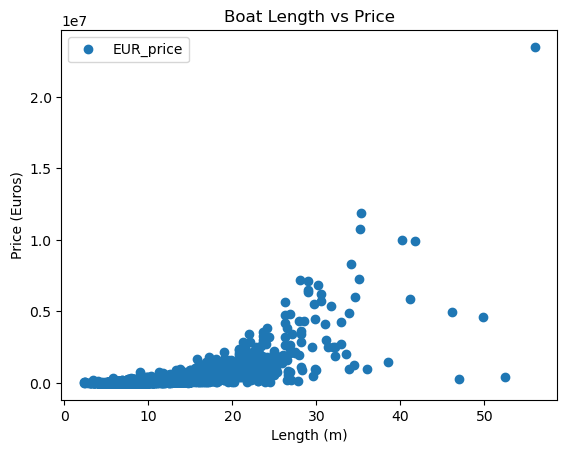

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x= 'Length', y = 'EUR_price', style = 'o')
plt.title('Boat Length vs Price')
plt.xlabel('Length (m)')
plt.ylabel('Price (Euros)')
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Length'].values.reshape(-1,1)
y = df['EUR_price'].values.reshape(-1,1)

In [20]:
X

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [21]:
y

array([[3490. ],
       [3399. ],
       [3535. ],
       ...,
       [4999.5],
       [4499. ],
       [3817.8]])

In [22]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
# Create a regression object
regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [24]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

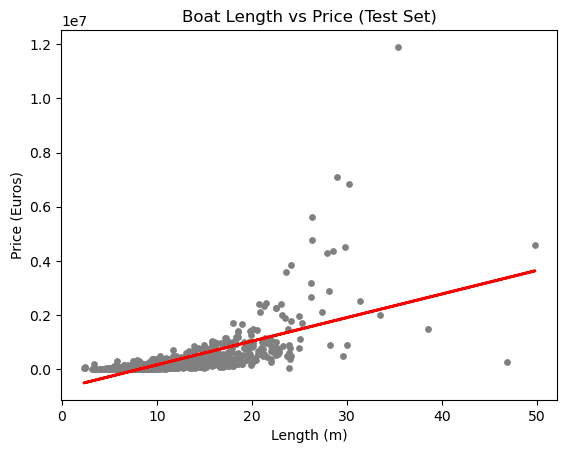

In [26]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 2)
plot_test.title('Boat Length vs Price (Test Set)')
plot_test.xlabel('Length (m)')
plot_test.ylabel('Price (Euros)')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[87136.89965407]]
Mean squared error: 188072770517.2413
R2 score: 0.37536249930836396


#### Interpretation

The slope is positive, so the relationship is positive. This aligns with the hypothesis that the longer the boat length, the higher the price. The MSE is high at 188072770517, so the regression line is not at all a representation of the data. Also, the R2 score of 0.375 represents a poor fit.

In [29]:
y_predicted

array([[ 193169.69573159],
       [-144050.10592967],
       [ 209725.70666586],
       ...,
       [-137950.52295389],
       [  10182.20645803],
       [  -4631.06648316]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [31]:
data.head(30)

,Actual,Predicted
0,69900.0,1.931697e+05
1,55449.0,-1.440501e+05
2,90000.0,2.097257e+05
3,38900.0,7.553488e+04
4,150000.0,-5.778458e+04
5,187000.0,8.860542e+04
6,34500.0,-8.479701e+04
7,575000.0,1.147319e+06
8,99890.0,1.018221e+04
9,15500.0,-9.873892e+04


#### Compare how regression fits the training set

In [32]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 Score:', r2)

Slope: [[87136.89965407]]
Mean squared error: 271273665585.87775
R2 Score: 0.3999620630643811


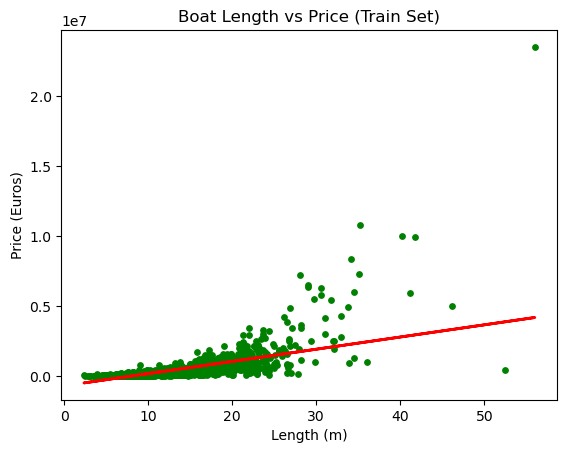

In [35]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 2)
plot_test.title('Boat Length vs Price (Train Set)')
plot_test.xlabel('Length (m)')
plot_test.ylabel('Price (Euros)')
plot_test.show()

#### Performance improvement after removing outliers?

In [36]:
# Clean the extreme values from the "Price per Unit" variable 
df_test =  df[df['EUR_price'] < 20000000]

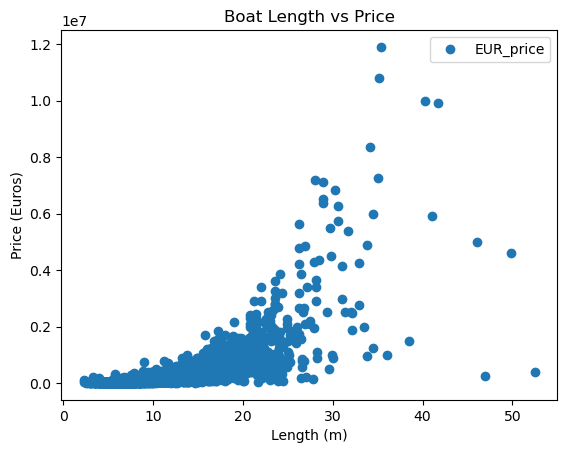

In [37]:
# Scatterplot without outliers

df_test.plot(x = 'Length', y = 'EUR_price', style = 'o')
plt.title('Boat Length vs Price')
plt.xlabel('Length (m)')
plt.ylabel('Price (Euros)')
plt.show()

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects
X_2 = df_test['Length'].values.reshape(-1,1)
y_2 = df_test['EUR_price'].values.reshape(-1,1)

In [39]:
# Split test data into a training set and a test set
X_test_2, X_train_2, y_test_2, y_train_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)

In [40]:
# Run and fit the regression
regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [41]:
# Predict
y_predicted_2 = regression.predict(X_test_2)

In [42]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [43]:
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[77265.45572454]]
Mean squared error: 180327151151.21246
R2 score: 0.4316514013781433


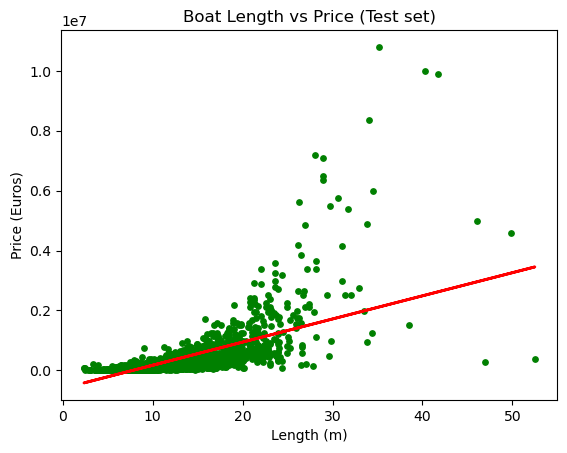

In [44]:
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color = 'green', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color = 'red', linewidth = 2)
plot_test.title('Boat Length vs Price (Test set)')
plot_test.xlabel('Length (m)')
plot_test.ylabel('Price (Euros)')
plot_test.show()

In [46]:
data_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_2.head(30)

,Actual,Predicted
0,49500.00,1.388980e+05
1,55900.00,1.504878e+05
2,1371535.00,8.281058e+05
3,237500.00,2.370251e+05
4,17860.84,-2.397028e+05
5,200000.00,5.947641e+05
6,450000.00,6.171711e+05
7,33000.00,-6.199223e+04
8,1705992.00,6.194891e+05
9,2100000.00,1.516541e+06
